c:\Users\Lab419_6\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


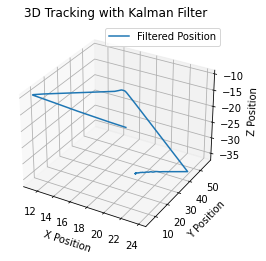

In [1]:
import pandas as pd
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 데이터 로드
df = pd.read_csv('C:/Users/Lab419_6/Desktop/20192230 이동섭/IMU sensor/test/time, accl, gyro, magn, angl, vel, pos.csv')

# Kalman 필터 초기화
initial_state = df[['Pos_X', 'Pos_Y', 'Pos_Z']].iloc[0]
kf = KalmanFilter(initial_state_mean=initial_state, n_dim_obs=3)

# 위치 데이터
positions = df[['Pos_X', 'Pos_Y', 'Pos_Z']]

# Kalman 필터 적용
(filtered_state_means, filtered_state_covariances) = kf.filter(positions)

# 필터링된 위치 데이터를 DataFrame으로 변환
df_filtered = pd.DataFrame(filtered_state_means, columns=['Filtered_Pos_X', 'Filtered_Pos_Y', 'Filtered_Pos_Z'])

# 3D 트래킹 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 필터링된 위치 데이터 플로팅
ax.plot(df_filtered['Filtered_Pos_X'], df_filtered['Filtered_Pos_Y'], df_filtered['Filtered_Pos_Z'], label='Filtered Position')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
plt.title('3D Tracking with Kalman Filter')
plt.legend()
plt.show()